<a href="https://colab.research.google.com/github/TRUPTIC01/AIML-Lab-Codes/blob/main/locallyWeightedRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

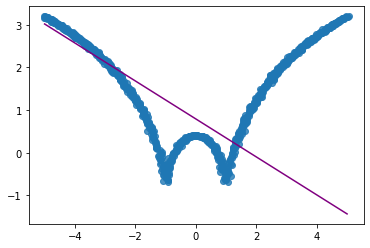

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,1000)
y = np.log(np.abs((x**2)-1)+0.5)
x += np.random.normal(scale=0.05,size=1000)

def kernel(x0,x,tau):
  return np.exp(np.sum((x-x0)*2,axis=1)/(-2*tau*2))


def local_regression(x0,x,y,tau):
  x0 = np.r_[1,x0] 
  x = np.c_[np.ones(len(x)),x]
  xw = x.T*kernel(x0,x,tau)
  beta = np.linalg.pinv(xw@x) @ xw @y
  return x0@beta


def plot_lr(tau):
  domain = np.linspace(-5,5,num = 500)
  pred = [local_regression(x0,x,y,tau) for x0 in domain]
  plt.scatter(x,y,alpha=0.8)
  plt.plot(domain,pred,color="purple")
  return plt

plot_lr(1).show()